# Gradient Boosting - Theory

Gradient Boosting este extrem de asemănător cu conceptul de Ada Boosting prin faptul că o să utilizăm weak learners și aceștia creați tot în serie pentru a crea un ansamblu de modele. Diferența este faptul că Gradient Boosting utilizează residual error (eroarea reziduală) pentur a crea aceste modele. 

În modelele de Gradient Boosting acceptăm crearea de modele de tipul Decison Tree mai mari, nu doar un model cu un singur Node și două Leaf Node cum era în cazul Ada Boosting.

Pentru a crea un model de Gradient Boosting o să folosim din nou acel set de date cu ciupercile

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/DATA/mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

Modelul de Gradient Boosting se găsește în sklearn.ensemble

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.2],
    'max_depth': [3, 4, 5]
}

In [9]:
model = GradientBoostingClassifier()
grid_model = GridSearchCV(model, param_grid)

In [10]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [11]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [12]:
y_preds = grid_model.predict(X_test)

In [13]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


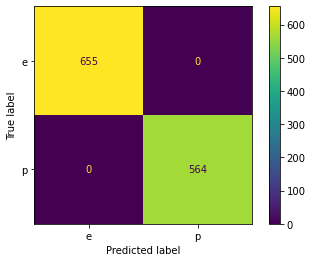

In [14]:
plot_confusion_matrix(grid_model, X_test, y_test)

Din valorile pe care le avem mai sus se pare că modelul de Gradient Boosting funcționează perfect, având o calitate de 100% la toate metricile. Aici se vede utilitatea de a avea anumite modele de DecisinTrees mai mari decât doar un singur Node și două Leaf Node. Putem să extragem parametrii care au fost utilizați pentru a crea acest model și de asemenea pentru cel mai bun estimator din acel grid putem să extragem feature importances ca să vedem care features au avut cea mai mare importanță în această clasificare

In [15]:
grid_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [16]:
grid_model.best_estimator_.feature_importances_

array([6.32283203e-04, 9.23813221e-17, 0.00000000e+00, 0.00000000e+00,
       7.05724766e-17, 1.67713590e-03, 3.20765679e-18, 1.54773368e-04,
       0.00000000e+00, 0.00000000e+00, 3.05078577e-16, 8.01859679e-16,
       1.16337851e-17, 0.00000000e+00, 0.00000000e+00, 4.26468986e-16,
       0.00000000e+00, 6.65876749e-02, 0.00000000e+00, 1.16098573e-02,
       4.60936317e-03, 9.73620678e-04, 6.23008069e-01, 1.89824543e-02,
       0.00000000e+00, 0.00000000e+00, 4.45323686e-08, 4.45729733e-03,
       2.93938405e-03, 0.00000000e+00, 3.54142636e-16, 0.00000000e+00,
       0.00000000e+00, 1.12899479e-16, 0.00000000e+00, 1.13270649e-16,
       3.12396540e-16, 0.00000000e+00, 1.93331358e-15, 1.00300493e-18,
       0.00000000e+00, 1.10428142e-03, 1.14329242e-01, 1.85250764e-02,
       1.55274215e-02, 1.62201952e-03, 0.00000000e+00, 1.74132045e-09,
       0.00000000e+00, 7.94717344e-04, 5.14488143e-02, 6.49015020e-04,
       0.00000000e+00, 0.00000000e+00, 9.08300322e-05, 3.18304444e-08,
      

În continuare o să creem un DataFrame cu aceste date și o să facem plot la datele respective ca să vedem și grafic importanța feature-urilor.

In [31]:
feat_imp = pd.DataFrame(index=X.columns, data=grid_model.best_estimator_.feature_importances_, columns=['Importances'])
feat_imp = feat_imp[feat_imp['Importances'] > 0]

In [33]:
feat_imp

,Importances
cap-shape_c,6.322832e-04
cap-shape_f,9.238132e-17
cap-shape_x,7.057248e-17
cap-surface_g,1.677136e-03
cap-surface_s,3.207657e-18
cap-surface_y,1.547734e-04
cap-color_g,3.050786e-16
cap-color_n,8.018597e-16
cap-color_p,1.163379e-17
cap-color_w,4.264690e-16


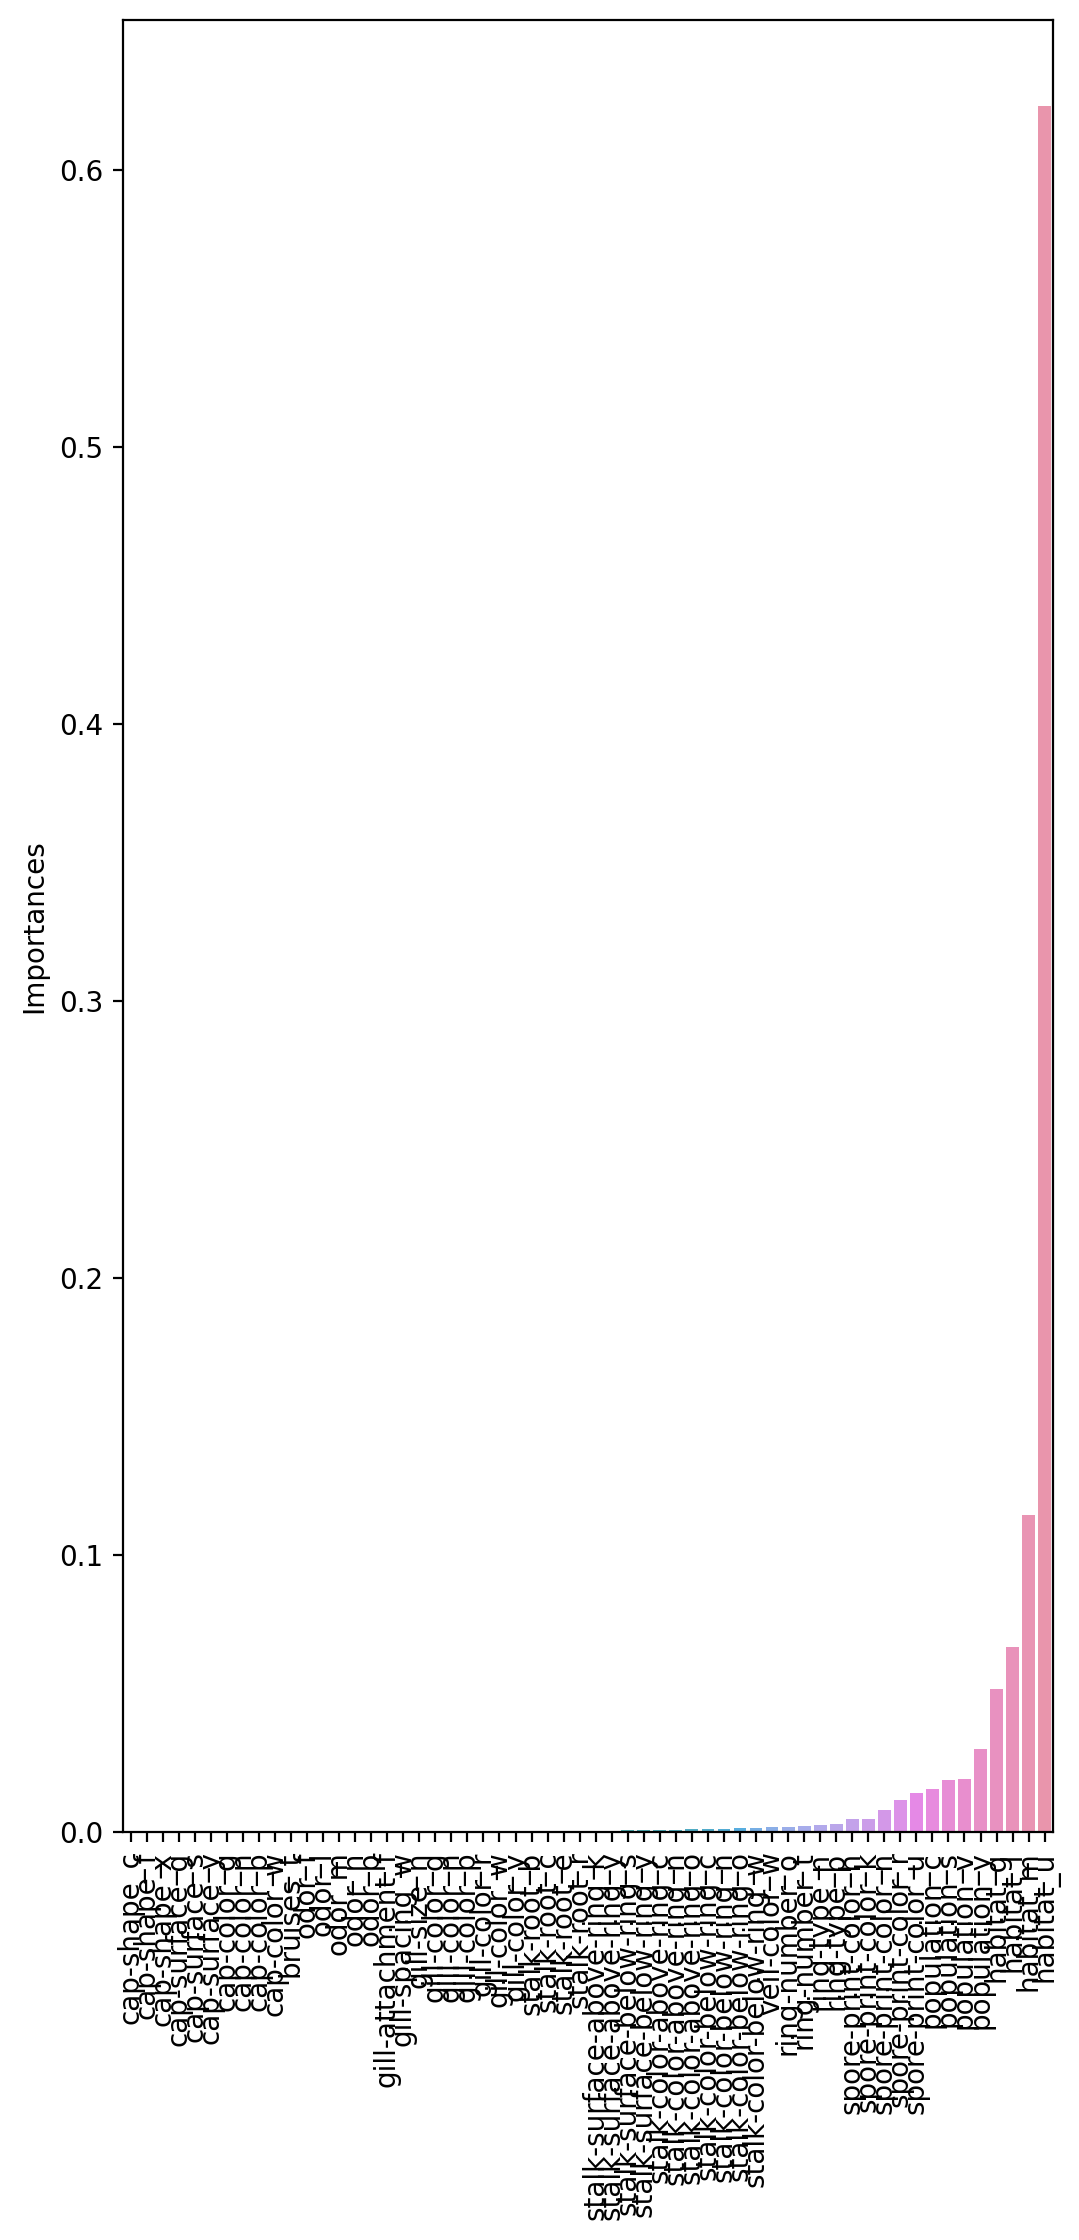

In [32]:
plt.figure(figsize=(6, 12), dpi=200)
sns.barplot(x=feat_imp.index, y=feat_imp['Importances'].sort_values(), data=feat_imp)
plt.xticks(rotation=90);

## Recapitulare

În cadrul acestei lecții am înățat următoarele lucruri:

    1. De unde să importăm un model de Gradient Boosting

        from sklearn.ensemble import GradientBoostingClassifier

    2. Cum să creem un model de GradientBoostingClassifier

        model = GradientBoostingClassifier()

    3. Care sunt cei mai importanți hyperparametrii pentru modelul de GradientBoostingClassifier

        n_estimators = numărul de estimatori, de algoritmi de DecisionTree

        learning_rate = rate cu care să învețe acei algoritmi de la unul la altul

        max_depth = adâncimea maximă a unui model de DecisonTree